_First code cell from custom template using [`jupyter_lab templates` extension](https://github.com/timkpaine/jupyterlab_templates)._

In [138]:
import sys
from pathlib import Path

def sys_info():
    frmt = 'Python ver: {}\nPython env: {}\n'
    frmt += 'OS:         {}\nCurrent dir: {}\n'
    print(frmt.format(sys.version, 
                      Path(sys.prefix).name,
                      sys.platform,
                      Path.cwd()))
sys_info()

def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """
    if up:
        # NB: Path does not have a str method.
        newp = Path(this_path).parent.as_posix()
    else:
        newp = Path(this_path).as_posix()
    
    if newp not in sys.path:
        sys.path.insert(1, newp)
        print('Path added to sys.path.')

# if notebook inside another folder, eg ./notebooks:
nb_folder = 'notebooks'
add_to_sys_path(Path.cwd(), Path.cwd().name.startswith(nb_folder))


# Filtered dir() for method discovery:
def filter_dir(mdl, filter_str=None, start_with_str='_', exclude=True):
    """Filter dir(mdl) for method discovery.
       Input:
       :param mdl (object): module, optionally with submodule path(s), e.g. mdl.submdl1.submdl2.
       :param filter_str (str, None): filter all method names containing that string.
       :param start_with_str (str, '_'), exclude (bool, True): start_with_str and exclude work 
              together to perform search on non-dunder methods (default).
    """
    search_dir = [d for d in dir(mdl) if not d.startswith(start_with_str) == exclude]
    if filter_str is None:
        return search_dir
    else:
        filter_str = filter_str.lower()
        return [d for d in search_dir if d.lower().find(filter_str) != -1]


def get_project_dirs(which=['data', 'images'],
                     nb_folder='notebooks',
                     use_parent=True):
    '''Create folder(s) named in `which` at the parent level.'''
    dir_lst = []
    if Path.cwd().name.startswith(nb_folder) or use_parent:
        dir_fn = Path.cwd().parent.joinpath
    else:
        dir_fn = Path.cwd().joinpath
        
    for d in which:
        DIR = dir_fn(d)
        if not DIR.exists():
            Path.mkdir(DIR)
        dir_lst.append(DIR)
    return dir_lst

DIR_DATA, DIR_IMG = get_project_dirs()
    
import numpy as np
import scipy as sp
from scipy import stats as sps
import pandas as pd
#pd.set_option("display.max_colwidth", 200)

import matplotlib as mpl
from matplotlib import pyplot as plt
plt.ion()
plt.style.use('seaborn-muted')

from pprint import pprint as pp

# To get multiple outputs from one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
from IPython.display import HTML, Markdown
# for presentations:
#display(HTML("<style>.container { width:100% !important; }</style>"))


def add_div(div_class='info', div_start='Tip:', 
            div_text='Some tip here', output_string=True):
    """
    Behaviour with default `output_string=True`:
    The cell is overwritten with the output, but the cell mode is still 'code',
    not 'markdown'.
    Workaround: After running the function, click on the new cell, press ESC, 
                type 'm', then run the new cell.
    If `output_string=False`, the output is displayed in an new cell with the 
    code cell visible.
    ```
    [x]
    add_div('alert-warning', 'Tip: ', 'some tip here', output_string=True)
    [x]
    <div class="alert alert-warning"><b>Tip: </b>some tip here</div>
    ```
    """
    accepted = ['info', 'warning', 'danger']
    div_class = div_class.lower()
    if div_class not in accepted:
        msg = f'<div class="alert"><b>Wrong class:&nbsp;</b> `div_start` not in: {accepted}.</div>'
        return Markdown(msg)
    
    div = f"""<div class="alert alert-{div_class}"><b>{div_start}&nbsp;&nbsp;</b>{div_text}</div>"""
    if output_string:
        return get_ipython().set_next_input(div, 'markdown')
    else:
        return Markdown(div)

    
def new_section(title='New section'):
    style = "text-align:center;background:#c2d3ef;padding:16px;color:#ffffff;font-size:2em;width:98%"
    div = f'<div style="{style}">{title}</div>'
    #return HTML('<div style="{}">{}</div>'.format(style, title))
    return get_ipython().set_next_input(div, 'markdown')


# autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    get_ipython().run_line_magic('load_ext', 'autoreload')

%autoreload 2

Python ver: 3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:11:50) [MSC v.1916 64 bit (AMD64)]
Python env: p37
OS:         win32
Current dir: C:\Users\catch\Documents\GH_Projects\VIS_projects\Mirrored_Barplot\notebooks



---
---
# Mirrored Barplots
---

In [139]:
from Mirror import mirrored_barplot as mirbar, rougier_paired_bar as rougier

* Public objects in the mirbar module:

In [140]:
filter_dir(mirbar)
mirbar?

['mirrored_barplot', 'np', 'partial', 'plt', 'sample_data', 'validate_series']

Type:        module
String form: <module 'Mirror.mirrored_barplot' from 'C:/Users/catch/Documents/GH_Projects/VIS_projects/Mirrored_Barplot\\Mirror\\mirrored_barplot.py'>
File:        c:\users\catch\documents\gh_projects\vis_projects\mirrored_barplot\mirror\mirrored_barplot.py
Docstring:  
Output a bar plot of two paired-series mirrored around x = 0 
(orient='horizontal, default), or y = 0 (orient='vertical').


* Which functions can be directly accressed?

In [141]:
mirbar.__all__

['mirrored_barplot', 'sample_data', 'validate_series']

In [142]:
# Data: all positive y-values
# Sample data:
s = 123       # random seed, default: None
y2_coeff = 5  # to obtain higher values on the second y-series, default: 4

x, y1, y2 = mirbar.sample_data(fixed=0, seed=s,)
xx, yy1, yy2 = mirbar.sample_data(fixed=0, seed=s, y2_factor=y2_coeff)

mirbar.validate_series(y1, y2)
mirbar.validate_series(yy1, yy2) 

## One paired series, horizontal reflection (default):

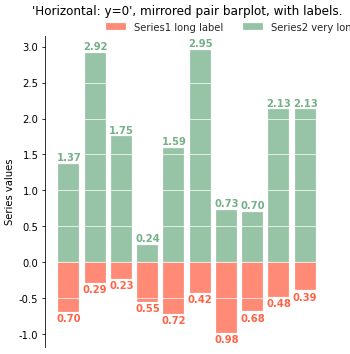

In [143]:
fig, ax = plt.subplots(1, figsize=(5,5))

mirbar.mirrored_barplot(ax, x, y1, y2, 
                        #orient='h',
                        label_bars=True,
                        series_labels=['Series1 long label', 'Series2 very long'],
                        title="'Horizontal: y=0', mirrored pair barplot, with labels.");

#plt.savefig(DIR_IMG.joinpath('mirrored_1H.png'))
plt.show();

## One paired series, vertical reflection (default):

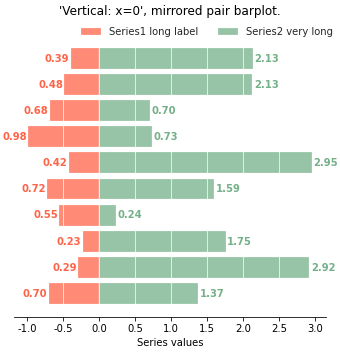

In [144]:
fig, ax = plt.subplots(1, figsize=(5,5))

mirbar.mirrored_barplot(ax, x, y1, y2, orient='v',
                        label_bars=True,
                        series_labels=['Series1 long label', 'Series2 very long'],
                        title="'Vertical: x=0', mirrored pair barplot.");

plt.savefig(DIR_IMG.joinpath('mirrored_1V.png'))
plt.show();

## Two paired series, horizontal reflection, shared y-axis:

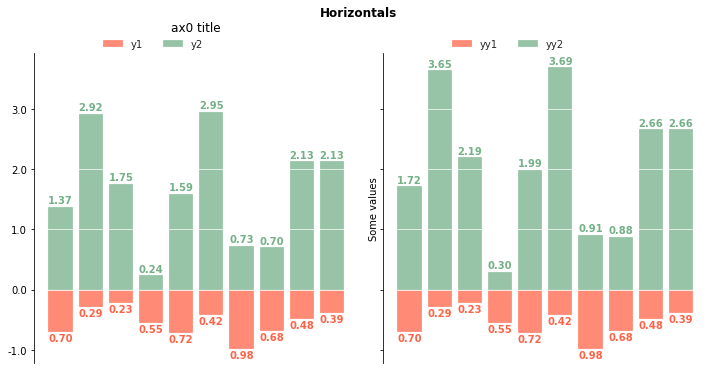

In [147]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)

mirbar.mirrored_barplot(axs[0], x, y1, y2,
                        label_bars=True,
                        axis_label=None,
                        series_labels=['y1', 'y2'],
                        title="ax0 title");

mirbar.mirrored_barplot(axs[1], xx, yy1, yy2,
                       label_bars=True,
                       series_labels=['yy1', 'yy2'],
                       axis_label='Some values',
                       );

supt = plt.suptitle('Horizontals', y=1.02,fontweight='bold')

plt.savefig(DIR_IMG.joinpath('mirrored_2H.png'),
            bbox_extra_artists=(supt,), bbox_inches='tight')
plt.show();

## Two paired series, vertical reflection, shared x-axis:

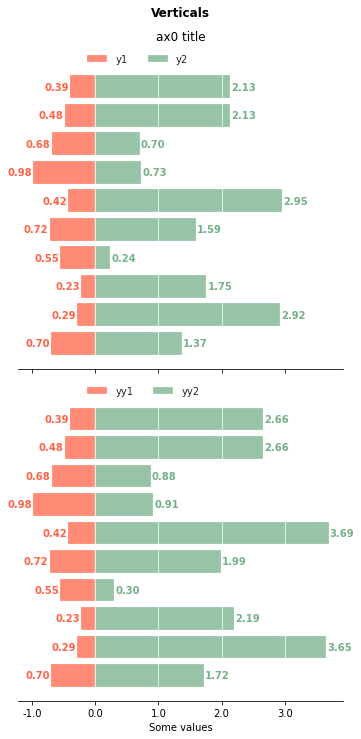

In [148]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 10), sharex=True)

mirbar.mirrored_barplot(axs[0], x, y1, y2, orient='v',
                        label_bars=True,
                        axis_label=None,
                        series_labels=['y1', 'y2'],
                        title="ax0 title");

mirbar.mirrored_barplot(axs[1], xx, yy1, yy2, orient='v',
                       label_bars=True,
                       series_labels=['yy1', 'yy2'],
                       axis_label='Some values',
                       );

supt = plt.suptitle('Verticals', y=1.02,fontweight='bold')

plt.savefig(DIR_IMG.joinpath('mirrored_2V.png'),
            bbox_extra_artists=(supt,), bbox_inches='tight')
plt.show();

# Rougier vis reproduction
>Attempt to generalize the implementation by  
Nicolas P. Rougier of New York Times graphics, 2007 (http://www.nytimes.com/imagepages/2007/07/29/health/29cancer.graph.web.html).  
Plot double paired categories

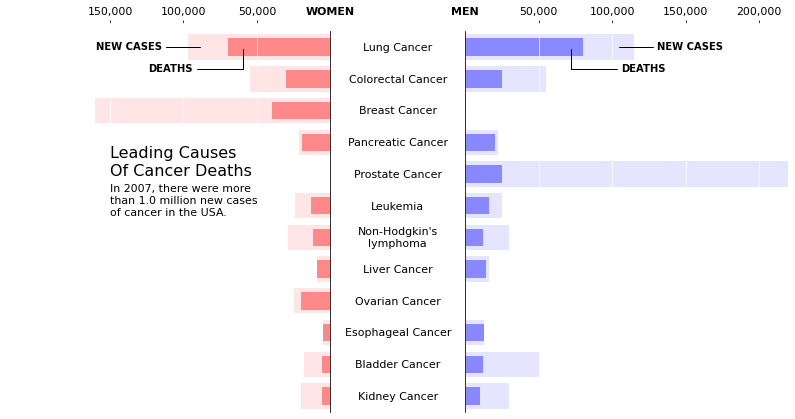

In [110]:
fig_name = DIR_IMG.joinpath('rougier_caption_left.png')
rougier.rougier_example()  

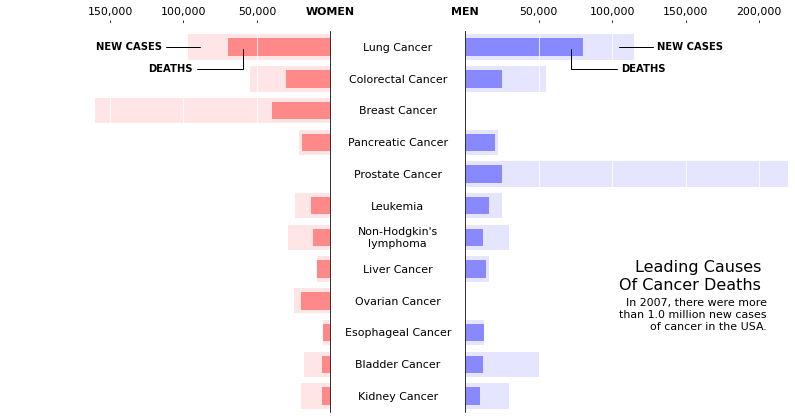

In [111]:
fig_name = DIR_IMG.joinpath('rougier_caption_right.png')
rougier_example(caption_side=1)  

# Same plot using mpl data:

In [12]:
from matplotlib.cbook import get_sample_data

fname = get_sample_data('percent_bachelors_degrees_women_usa.csv', asfileobj=False)
df_wom = pd.read_csv(fname, index_col='Year')
majors = df_wom.columns.tolist()  #categories

# Take first and last years:
df_w = df_wom.loc[df_wom.index[[0, -1]], :].apply(np.round, decimals=2)
yrs = df_w.index.tolist()
df_m = df_w.apply(lambda x: 100-x).apply(np.round, decimals=2)

women_yr1 = df_w.loc[yrs[0]].values.tolist()
women_yr2 = df_w.loc[yrs[1]].values.tolist()

men_yr1 = df_m.loc[yrs[0]].values.tolist()
men_yr2 = df_m.loc[yrs[1]].values.tolist()

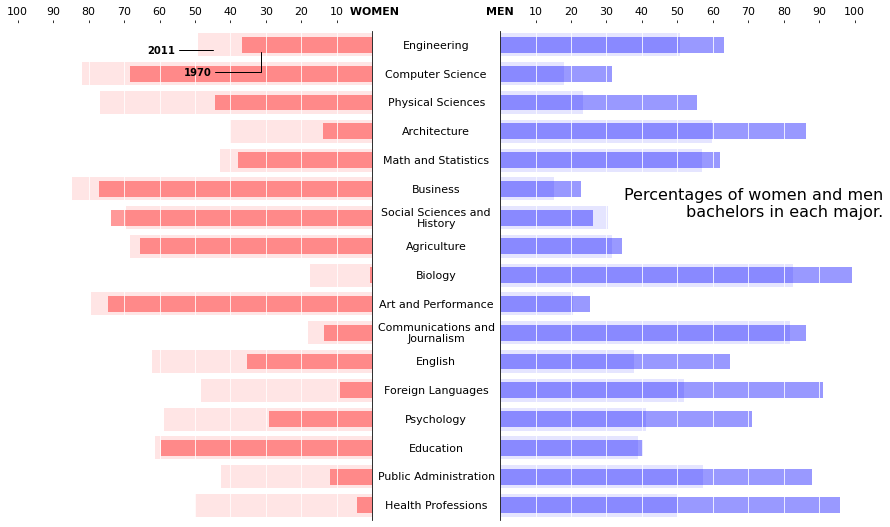

In [135]:
pairs = (' WOMEN', 'MEN')

# left panel
xtl_pos = np.arange(100, -10, -10) # reverse
xtl_lbls = [str(n) for n in xtl_pos]
xtl_lbls[-1] = pairs[0]

# right panel
xtr_pos = xtl_pos[::-1] # reverse
xtr_lbls = [str(n) for n in xtr_pos]
xtr_lbls[0] =  pairs[1]

xt_pos = (xtl_pos, xtr_pos) 
xt_lbls = (xtl_lbls, xtr_lbls)

years = (str(yrs[0]),str(yrs[1]))

caption_hdr = 'Percentages of women and men\nbachelors in each major.'
caption_args = {'y_pos_pct': 0.68, 'x_pos_offset':25}

fig_style = {'figsize':(15,9), 'facecolor':None}
fontdict = {'fontsize': 11}

save_fig = True
fig_name = DIR_IMG.joinpath('mpl_bachelors_caption_right.png')

rougier.plot_paired_categories(majors,
                               (women_yr1, women_yr2),
                               (men_yr1, men_yr2),
                               xt_pos, xt_lbls,
                               face_cols=['red','blue'],
                               equal_lims=True,
                               y_lbl_ofs=0.5,
                               pair_labels=years,
                               annotate_side='left',
                               caption_ax=1,
                               caption=[caption_hdr, ''],
                               caption_kwargs=caption_args,
                               tx_kwargs = fontdict,
                               fig_style=fig_style,
                               save_as=fig_name,
                               save_fig=save_fig)

# Figure from original mpl example:

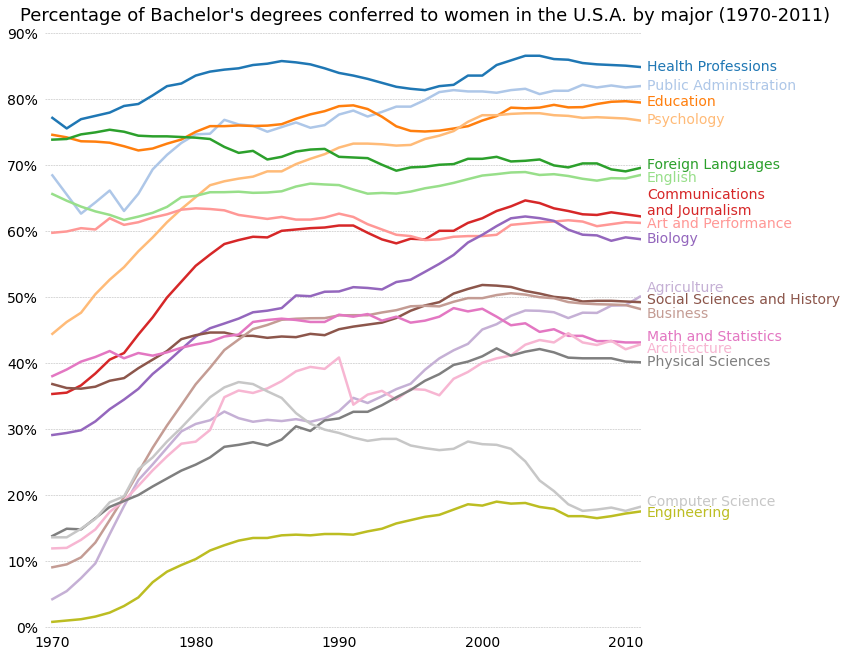

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data


fname = get_sample_data('percent_bachelors_degrees_women_usa.csv',
                        asfileobj=False)
gender_degree_data = np.genfromtxt(fname, delimiter=',', names=True)

# You typically want your plot to be ~1.33x wider than tall. This plot
# is a rare exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

# These are the colors that will be used in the plot
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(1969.5, 2011.1)
ax.set_ylim(-0.25, 90)

# Set a fixed location and format for ticks.
ax.set_xticks(range(1970, 2011, 10))
ax.set_yticks(range(0, 91, 10))
# Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_major_formatter('{x:.0f}%')

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

# Now that the plot is prepared, it's time to actually plot the data!
# Note that I plotted the majors in order of the highest % in the final year.
majors = ['Health Professions', 'Public Administration', 'Education',
          'Psychology', 'Foreign Languages', 'English',
          'Communications\nand Journalism', 'Art and Performance', 'Biology',
          'Agriculture', 'Social Sciences and History', 'Business',
          'Math and Statistics', 'Architecture', 'Physical Sciences',
          'Computer Science', 'Engineering']

y_offsets = {'Foreign Languages': 0.5, 'English': -0.5,
             'Communications\nand Journalism': 0.75,
             'Art and Performance': -0.25, 'Agriculture': 1.25,
             'Social Sciences and History': 0.25, 'Business': -0.75,
             'Math and Statistics': 0.75, 'Architecture': -0.75,
             'Computer Science': 0.75, 'Engineering': -0.25}

for column in majors:
    # Plot each line separately with its own color.
    column_rec_name = column.replace('\n', '_').replace(' ', '_')

    line, = ax.plot('Year', column_rec_name, data=gender_degree_data,
                    lw=2.5)

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = gender_degree_data[column_rec_name][-1] - 0.5

    if column in y_offsets:
        y_pos += y_offsets[column]

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    ax.text(2011.5, y_pos, column, fontsize=14, color=line.get_color())

# Make the title big enough so it spans the entire plot, but don't make it
# so big that it requires two lines to show.

# Note that if the title is descriptive enough, it is unnecessary to include
# axis labels; they are self-evident, in this plot's case.
fig.suptitle("Percentage of Bachelor's degrees conferred to women in "
             "the U.S.A. by major (1970-2011)", fontsize=18, ha="center")

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
# 
fig.savefig(DIR_IMG.joinpath('mpl_bachelors_example.png'), bbox_inches='tight')
plt.show();

---
---

---
---
# Documentation about UserWarning: not panda related, Matplotlib 3.3.0+
* My post in Pandas issue #35684:
https://github.com/pandas-dev/pandas/issues/35684#issuecomment-683924768


C:\Users\catch\Anaconda3\envs\p37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


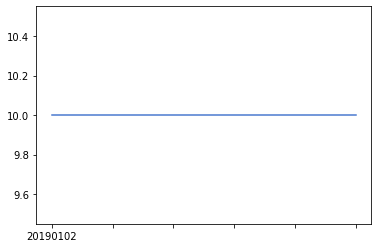

In [9]:
pd.Series({"20190102": 10, "20190103": 10}).plot();

In [10]:
print('Matplotlib:', mpl.__version__)
print('Python:', sys.version)
print('Platform:', sys.platform)

# test data
np.random.seed(123)

x = np.array(range(10))
y = np.random.random_sample(10)*4

Matplotlib: 3.3.1
Python: 3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:11:50) [MSC v.1916 64 bit (AMD64)]
Platform: win32


C:\Users\catch\Anaconda3\envs\p37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


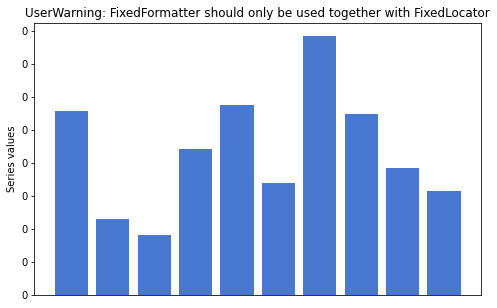

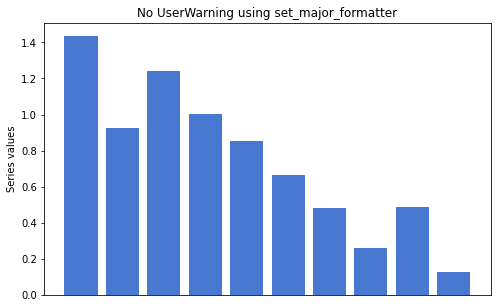

In [11]:
fig, ax = plt.subplots(1, figsize=(8,5))

title1 = "UserWarning: FixedFormatter should only be used together with FixedLocator"
ax.bar(x, y)

labels = [str(np.round(item.get_position()[1], 3))
          for item in ax.get_yticklabels()]

ax.set(xlim=None,
        xticks=[],
        xlabel='',
        yticklabels=labels,
        ylabel='Series values',
        title=title1
       )

plt.savefig(DIR_IMG.joinpath('user_warn_on.png'))
plt.show();
#.......................................................

fig, ax = plt.subplots(1, figsize=(8,5))

title2 = "No UserWarning using set_major_formatter"
ax.bar(x, y1)

ax.yaxis.set_major_formatter('{x:.1f}')
ax.set(xlim=None,
       xticks=[],
       xlabel='',
       #yticklabels=labels,
       ylabel='Series values',
       title=title2
      )

plt.savefig(DIR_IMG.joinpath('user_warn_off.png'))
plt.show();